In [77]:
# （参考）Google Driveにマウントして、ここからデータを読む場合
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import roc_auc_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pdp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
import math
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline
import re

#import japanize_matplotlib

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

In [167]:
#正規分布の確認
def check_norm(x):
    plt.hist(x, bins=100)#ヒストグラム表示
    plt.pause(.01)
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    p=stats.shapiro(x)#シャピロウィルク検定
    print(p)

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs, y_pred])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

# Sklearn Model

## Residentialモデル

In [168]:
cd drive/MyDrive/data

[Errno 2] No such file or directory: 'drive/MyDrive/data'
/content/drive/MyDrive/data


In [169]:
train_df_res= pd.read_pickle("train_df_res_dum.pkl")
test_df_res= pd.read_pickle("test_df_res_dum.pkl")

In [170]:
train_df_res.head()

,ASSESSMENT_NBHD,BULD_AGE,FIREPLACES,LIV_DUR,LANDAREA,SALEDATE_YEAR,BATHRM_ALL,ROOM_ALL,YR_RMDL,AYB,RM_SALE,GBA,CNDTN,DISTANCE_LOC,GRADE,PRICE,AC_N,AC_Y,SALEDATE_YEAR_GROUP_1980-1995,SALEDATE_YEAR_GROUP_1995-2000,SALEDATE_YEAR_GROUP_2000-2005,SALEDATE_YEAR_GROUP_2005-2010,SALEDATE_YEAR_GROUP_2010-2015,SALEDATE_YEAR_GROUP_2015-2020,QUADRANT_NE,...,AYB_GROUP_1850-1860,AYB_GROUP_1860-1870,AYB_GROUP_1870-1880,AYB_GROUP_1880-1890,AYB_GROUP_1890-1900,AYB_GROUP_1900-1910,AYB_GROUP_1910-1920,AYB_GROUP_1920-1930,AYB_GROUP_1930-1940,AYB_GROUP_1940-1950,AYB_GROUP_1950-1960,AYB_GROUP_1960-1970,AYB_GROUP_1970-1980,AYB_GROUP_1980-1990,AYB_GROUP_1990-2000,AYB_GROUP_2000-2010,AYB_GROUP_2010-2020,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,16,87.0,0,87.000000,1789,1982.0,1,9,2008.769593,1929.0,-26.769593,1088.0,2,5.902519,2,60000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,69.0,0,34.500000,2464,1984.0,1,8,2007.939864,1947.0,-23.939864,918.0,2,5.282218,2,40000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,42,91.0,0,30.333333,1876,1985.0,3,9,2004.769593,1925.0,-19.769593,1700.0,2,0.680248,4,173000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,39.0,0,39.000000,1159,1986.0,3,9,1985.000000,1977.0,1.000000,1870.0,2,2.704600,2,89000.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,18,42.0,0,21.000000,3001,1990.0,3,10,2003.032353,1974.0,-13.032353,1240.0,2,1.248676,3,116500.0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [171]:
train_df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38855 entries, 0 to 38854
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSESSMENT_NBHD                38855 non-null  int64  
 1   BULD_AGE                       38855 non-null  float64
 2   FIREPLACES                     38855 non-null  int64  
 3   LIV_DUR                        38855 non-null  float64
 4   LANDAREA                       38855 non-null  int64  
 5   SALEDATE_YEAR                  38855 non-null  float64
 6   BATHRM_ALL                     38855 non-null  int64  
 7   ROOM_ALL                       38855 non-null  int64  
 8   YR_RMDL                        38855 non-null  float64
 9   AYB                            38855 non-null  float64
 10  RM_SALE                        38855 non-null  float64
 11  GBA                            38855 non-null  float64
 12  CNDTN                          38855 non-null 

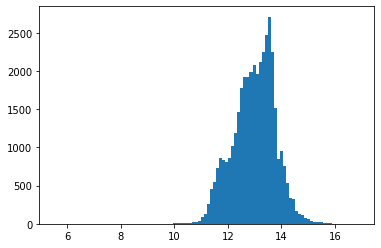

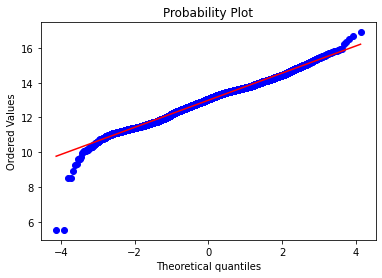

(0.9907767176628113, 9.65494641919799e-43)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [172]:
train_df_res["PRICE"] = np.log1p(train_df_res["PRICE"])
check_norm(train_df_res["PRICE"])

In [173]:
train_y_r = train_df_res.PRICE.values
train_df_r = train_df_res.drop(columns={"PRICE"})

In [174]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


In [175]:
#Validation function
n_folds = 3

def rmsle_cv_r(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_r.values)
    rmse= np.sqrt(-cross_val_score(model, train_df_r.values, train_y_r, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [176]:
reg = linear_model.LinearRegression()
MLPreg = make_pipeline(StandardScaler(),MLPRegressor(random_state=1, max_iter=500, ))
lasso = make_pipeline(StandardScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(StandardScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3,max_iter=2000))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_seed=9)

In [118]:
score = rmsle_cv_r(reg)
print("\nreg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


reg score: 0.4521 (0.2752)



In [100]:
score = rmsle_cv_r(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4382 (0.2511)



In [101]:
score = rmsle_cv_r(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4373 (0.2512)



In [102]:
score = rmsle_cv_r(GBoost)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4505 (0.2680)



In [92]:
score = rmsle_cv_r(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[06:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost score: 0.4538 (0.2596)



In [21]:

score = rmsle_cv_r(model_lgb)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

lightgbm score: 0.4593 (0.2596)



In [177]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [23]:
averaged_models_res = AveragingModels(models = (model_xgb,model_lgb))

score = rmsle_cv_r(averaged_models_res)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[05:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Averaged base models score: 0.4531 (0.2613)



In [190]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [191]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,lasso,model_lgb,model_xgb,GBoost),
                                                 meta_model = reg)

score = rmsle_cv_r(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[07:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:03:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Condminiumモデル

In [178]:
train_df_cond = pd.read_pickle("train_df_cond_dum.pkl")
test_df_cond = pd.read_pickle("test_df_cond_dum.pkl")

In [179]:
train_df_cond["PRICE"] = np.log1p(train_df_cond["PRICE"])

In [180]:
#train_df_cond["LIVING_GBA"] = np.log1p(train_df_cond["LIVING_GBA"])
#test_df_cond["LIVING_GBA"] = np.log1p(test_df_cond["LIVING_GBA"])
#check_norm(train_df_cond["LIVING_GBA"])

In [181]:
train_y_c = train_df_cond.PRICE.values
train_df_c = train_df_cond.drop(columns={"PRICE"})

In [140]:
#Validation function
n_folds = 3

def rmsle_cv_c(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_c.values)
    rmse= np.sqrt(-cross_val_score(model, train_df_c.values, train_y_c, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [141]:
score = rmsle_cv_c(reg)
print("\nreg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


reg score: 0.3894 (0.1203)



In [35]:
score = rmsle_cv_c(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.449077762291836, tolerance: 0.7991039700015369
  positive)



Lasso score: 0.3946 (0.1726)



In [36]:
score = rmsle_cv_c(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3921 (0.1701)



In [37]:
score = rmsle_cv_c(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[05:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost score: 0.3805 (0.2013)



In [38]:
score = rmsle_cv_c(model_lgb)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

lightgbm score: 0.3824 (0.2065)



In [39]:
averaged_models_con = AveragingModels(models = (model_xgb,model_lgb))

score = rmsle_cv_c(averaged_models_con)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


[05:53:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Averaged base models score: 0.3780 (0.2054)



In [40]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,reg,model_lgb,model_xgb),
                                                 meta_model = model_xgb)
score = rmsle_cv_c(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[05:54:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.858351679679572, tolerance: 0.7991039700015369
  positive)


[05:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Stacking Averaged models score: 0.3929 (0.1954)


## Submit

In [182]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [183]:
set(train_df_c.columns)^set(test_df_cond.columns)

{'Id'}

In [184]:
set(train_df_r.columns)^set(test_df_res.columns)

{'Id'}

In [185]:
test_ID_res = test_df_res["Id"]
test_df_res = test_df_res.drop(columns={"Id"})

test_ID_cond = test_df_cond["Id"]
test_df_cond = test_df_cond.drop(columns={"Id"})

In [186]:
model_res = stacked_averaged_models

In [187]:
# res xgboost
model_res.fit(train_df_r.values, train_y_r)
res_pred_train = model_res.predict(train_df_r.values)
res_pred_test = np.expm1(model_res.predict(test_df_res.values))
print(rmsle(train_y_r, res_pred_train))

[07:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.16943608241403205


In [ ]:
_, ax = plt.subplots(figsize=(12, 30))
xgb.plot_importance(model_res,ax=ax)

In [ ]:
# res アンサンブル
#averaged_models_res.fit(train_df_r, train_y_r)
#res_pred_train = averaged_models_res.predict(train_df_r)
#res_pred_test = np.expm1(averaged_models_res.predict(test_df_res))
#print(rmsle(train_y_r, res_pred_train))

In [188]:
model_cond = stacked_averaged_models

In [189]:
# con lightgbm
model_cond.fit(train_df_c.values, train_y_c)
cond_pred_train =model_cond.predict(train_df_c.values)
cond_pred_test = np.expm1(model_cond.predict(test_df_cond.values))
print(rmsle(train_y_c, cond_pred_train))

[07:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1567155027057673


ValueError: ignored

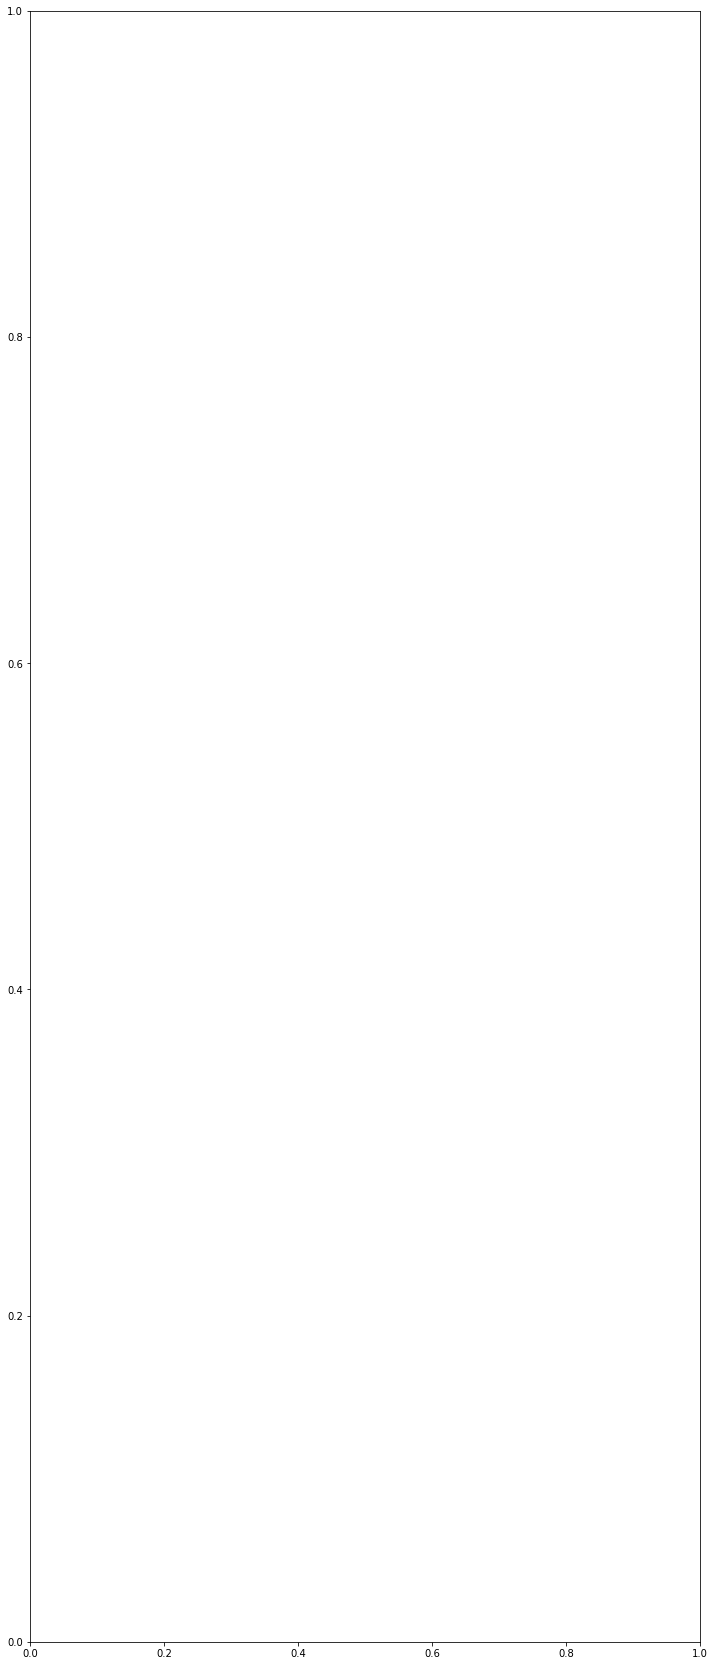

In [153]:
_, ax = plt.subplots(figsize=(12, 30))
xgb.plot_importance(model_cond,ax=ax)

In [ ]:
# con アンサンブル
#averaged_models_con.fit(train_df_c, train_y_c)
#cond_pred_train = averaged_models_con.predict(train_df_c)
#cond_pred_test = np.expm1(averaged_models_con.predict(test_df_cond))
#print(rmsle(train_y_c, cond_pred_train))

In [154]:
submit_r = pd.DataFrame()
submit_r['Id'] = test_ID_res
submit_r['PRICE'] = res_pred_test

In [155]:
submit_c = pd.DataFrame()
submit_c['Id'] = test_ID_cond
submit_c['PRICE'] = cond_pred_test

In [156]:
submit = pd.concat([submit_r,submit_c]).sort_index()

In [157]:
submit

,Id,PRICE
0,82653,2.574727e+05
1,82654,5.024279e+05
2,82655,4.556360e+05
3,82657,2.538001e+05
4,82658,4.837400e+05
...,...,...
7488,92387,5.538131e+05
7489,92388,5.309857e+05
7490,92389,8.645137e+05
7491,92390,1.008077e+06


In [158]:
#cd submit

In [159]:
submit.to_csv("submit/submit_3.csv",index=0)